In [1]:
%cd ..

/home/s-uesaka/augment_xgaze


In [2]:
from pathlib import Path
from notebook_utils import get_normalized_image_and_lm, get_augmented_image_and_lm, get_concat_h, draw_lm, draw_horizontal_line

In [3]:
import torch
import requests
from PIL import Image
from diffusers import StableDiffusionDepth2ImgPipeline

pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
   "stabilityai/stable-diffusion-2-depth",
   torch_dtype=torch.float16,
).to("cuda")

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [4]:
from stable_diffusion_utils import DepthToImage

In [ ]:
generator = DepthToImage()

In [6]:
image, lm = get_normalized_image_and_lm(dataset_dir = Path("/work/jqin/diffusion_iccv/xgaze_512/train"),
                                        subject_number =95,
                                        image_index = 4,
                                        random_sample=False,
                                        max_image_index=30)

/work/jqin/diffusion_iccv/xgaze_512/train/subject0095.h5
Image Index: 4, Path: /work/jqin/diffusion_iccv/xgaze_512/train/subject0095.h5 CameraIndex: 5


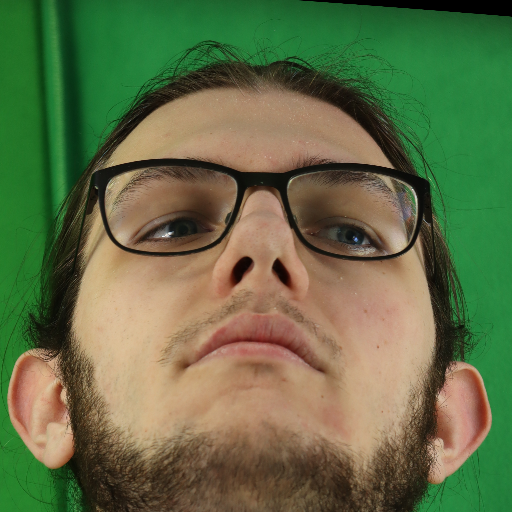

In [7]:
image

In [12]:
prompt = "photo of a person's face"
n_propmt = "deformed, bad anotomy"

In [ ]:
add_negative_prompt = False
#https://github.com/huggingface/diffusers/blob/main/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_depth2img.py
huggingface_image = pipe(prompt=prompt, image=image, negative_prompt=(n_propmt if add_negative_prompt else None), num_images_per_prompt=1, strength=0.6, guidance_scale=3.5).images[0]

In [ ]:
add_negative_prompt = True
#https://github.com/huggingface/diffusers/blob/main/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_depth2img.py
huggingface_image_with_n_prompt = pipe(prompt=prompt, image=image, negative_prompt=(n_propmt if add_negative_prompt else None), num_images_per_prompt=1, strength=0.6, guidance_scale=3.5).images[0]

In [ ]:
official_image = generator.generate_image(image=image, prompt = prompt, seed=0, scale=3.5, steps=50, strength=0.6)

In [ ]:
get_concat_h(image, get_concat_h(huggingface_image_with_n_prompt, get_concat_h(huggingface_image, official_image)))

In [14]:
add_negative_prompt = True

import time

start_time = time.time()
pipe(prompt=prompt, image=image, negative_prompt=(n_propmt if add_negative_prompt else None), num_images_per_prompt=1, strength=0.6, guidance_scale=3.5).images[0](image=image, prompt = prompt, seed=0, scale=3.5, steps=50, strength=0.6, num_images_per_prompt=5)

print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/30 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_3488902/3553218208.py:4 in <module>                                               │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_3488902/3553218208.py'                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: 'Image' object is not callable

In [10]:
start_time = time.time()
for i in range(5)
    generator.generate_image(image=image, prompt = prompt, seed=0, scale=3.5, steps=50, strength=0.6, num_images_per_prompt=1)
print("--- %s seconds ---" % (time.time() - start_time))

╭──────────────────────────────────────────────────────────────────────────────────────────────────╮
│  /tmp/ipykernel_3488902/682336122.py:2                                                           │
│ for i in range(5)                                                                                │
│                  ▲                                                                               │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
SyntaxError: expected ':'